In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/WhenPigsFlyContext/baselines/CRT
! pip install ml-collections

In [2]:
import sys
sys.path.append("..")
import json
import yaml
import pathlib
import pickle
import random
import copy

import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms, utils
from torchvision.transforms.functional import to_pil_image, to_tensor
from torch.utils.data import Dataset, DataLoader

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

import PIL
from PIL import Image, ImageDraw
from tqdm import tqdm, trange
import cv2
from google.colab.patches import cv2_imshow

from utils import *
from naturaldesign.naturaldesign import NaturalDesign


In [3]:
test_imagedir = "../../naturaldesign/"
context_size, target_size = (224, 224), (224, 224)
dataset = NaturalDesign(test_imagedir, context_size, target_size)

In [4]:
%%capture

model_dict = {    
    "model_dir": "../../output_modelmix4ZR/checkpoint_29.tar",
    "config": "../../output_modelmix4ZR/config.yaml"
}

model = loadModel(model_dict["model_dir"], model_dict["config"])

para_dict = {
    "model": model,
    "dataset": dataset, 
    "num_layers": [0, 1, 2, 3, 4, 5],
    "threshold": 0.02,
    "search_size": 200,
    "image_size": (1024, 1280)
}

In [5]:
CRTNet_res, attention_map, scan_paths, attention_map_VIT_2032, attention_map_VIT_original = CRTTest_NaturalDesign(para_dict["dataset"], para_dict["model"], para_dict["num_layers"][4], para_dict["threshold"], para_dict["search_size"], para_dict["image_size"])

  0%|          | 1/240 [00:05<21:11,  5.32s/it]

 CRTNet_1: 13	

  1%|          | 2/240 [00:07<14:15,  3.59s/it]

 CRTNet_2: 11	

  1%|▏         | 3/240 [00:09<11:28,  2.91s/it]

 CRTNet_3: 10	

  2%|▏         | 4/240 [00:11<09:43,  2.47s/it]

 CRTNet_4: 14	

  2%|▏         | 5/240 [00:13<08:21,  2.14s/it]

 CRTNet_5: 3	

  2%|▎         | 6/240 [00:14<07:55,  2.03s/it]

 CRTNet_6: 1	

  3%|▎         | 7/240 [00:16<07:15,  1.87s/it]

 CRTNet_7: 2	

  3%|▎         | 8/240 [00:18<07:12,  1.87s/it]

 CRTNet_8: 3	

  4%|▍         | 9/240 [00:19<06:40,  1.73s/it]

 CRTNet_9: 61	

  4%|▍         | 10/240 [00:21<06:31,  1.70s/it]

 CRTNet_10: 15	

  5%|▍         | 11/240 [00:23<06:37,  1.74s/it]

 CRTNet_11: 10	

  5%|▌         | 12/240 [00:25<06:46,  1.78s/it]

 CRTNet_12: 9	

  5%|▌         | 13/240 [00:26<06:31,  1.72s/it]

 CRTNet_13: 9	

  6%|▌         | 14/240 [00:28<06:13,  1.65s/it]

 CRTNet_14: 4	

  6%|▋         | 15/240 [00:29<06:03,  1.62s/it]

 CRTNet_15: 2	

  7%|▋         | 16/240 [00:31<05:48,  1.56s/it]

 CRTNet_16: 2	

  7%|▋         | 17/240 [00:33<06:07,  1.65s/it]

 CRTNet_17: 9	

  8%|▊         | 18/240 [00:34<05:58,  1.61s/it]

 CRTNet_18: 39	

  8%|▊         | 19/240 [00:36<05:54,  1.60s/it]

 CRTNet_19: 4	

  8%|▊         | 20/240 [00:37<05:52,  1.60s/it]

 CRTNet_20: 2	

  9%|▉         | 21/240 [00:39<05:38,  1.55s/it]

 CRTNet_21: 2	

  9%|▉         | 22/240 [00:40<05:42,  1.57s/it]

 CRTNet_22: 2	

 10%|▉         | 23/240 [00:42<06:00,  1.66s/it]

 CRTNet_23: 4	

 10%|█         | 24/240 [00:44<05:47,  1.61s/it]

 CRTNet_24: 2	

 10%|█         | 25/240 [00:46<06:17,  1.76s/it]

 CRTNet_25: 5	

 11%|█         | 26/240 [00:47<06:02,  1.69s/it]

 CRTNet_26: 9	

 11%|█▏        | 27/240 [00:49<05:38,  1.59s/it]

 CRTNet_27: 1	

 12%|█▏        | 28/240 [00:50<05:21,  1.52s/it]

 CRTNet_28: 4	

 12%|█▏        | 29/240 [00:51<05:18,  1.51s/it]

 CRTNet_29: 7	

 12%|█▎        | 30/240 [00:53<05:16,  1.50s/it]

 CRTNet_30: 2	

 13%|█▎        | 31/240 [00:54<05:12,  1.50s/it]

 CRTNet_31: 4	

 13%|█▎        | 32/240 [00:56<05:04,  1.46s/it]

 CRTNet_32: 20	

 14%|█▍        | 33/240 [00:57<04:57,  1.44s/it]

 CRTNet_33: 13	

 14%|█▍        | 34/240 [00:59<04:48,  1.40s/it]

 CRTNet_34: 5	

 15%|█▍        | 35/240 [01:00<04:59,  1.46s/it]

 CRTNet_35: 31	

 15%|█▌        | 36/240 [01:02<05:01,  1.48s/it]

 CRTNet_36: 33	

 15%|█▌        | 37/240 [01:03<04:56,  1.46s/it]

 CRTNet_37: 1	

 16%|█▌        | 38/240 [01:05<04:59,  1.48s/it]

 CRTNet_38: 25	

 16%|█▋        | 39/240 [01:06<04:53,  1.46s/it]

 CRTNet_39: 9	

 17%|█▋        | 40/240 [01:07<04:48,  1.44s/it]

 CRTNet_40: 3	

 17%|█▋        | 41/240 [01:09<04:45,  1.43s/it]

 CRTNet_41: 1	

 18%|█▊        | 42/240 [01:10<04:48,  1.46s/it]

 CRTNet_42: 11	

 18%|█▊        | 43/240 [01:12<04:46,  1.46s/it]

 CRTNet_43: 5	

 18%|█▊        | 44/240 [01:14<05:06,  1.56s/it]

 CRTNet_44: 1	

 19%|█▉        | 45/240 [01:15<05:02,  1.55s/it]

 CRTNet_45: 9	

 19%|█▉        | 46/240 [01:17<05:38,  1.74s/it]

 CRTNet_46: 3	

 20%|█▉        | 47/240 [01:19<05:38,  1.75s/it]

 CRTNet_47: 1	

 20%|██        | 48/240 [01:20<05:17,  1.65s/it]

 CRTNet_48: 2	

 20%|██        | 49/240 [01:22<05:28,  1.72s/it]

 CRTNet_49: 3	

 21%|██        | 50/240 [01:24<05:13,  1.65s/it]

 CRTNet_50: 41	

 21%|██▏       | 51/240 [01:25<05:04,  1.61s/it]

 CRTNet_51: 2	

 22%|██▏       | 52/240 [01:27<04:57,  1.58s/it]

 CRTNet_52: 4	

 22%|██▏       | 53/240 [01:28<04:50,  1.55s/it]

 CRTNet_53: 3	

 22%|██▎       | 54/240 [01:30<04:44,  1.53s/it]

 CRTNet_54: 2	

 23%|██▎       | 55/240 [01:31<04:34,  1.49s/it]

 CRTNet_55: 1	

 23%|██▎       | 56/240 [01:33<04:27,  1.45s/it]

 CRTNet_56: 2	

 24%|██▍       | 57/240 [01:34<04:20,  1.42s/it]

 CRTNet_57: 2	

 24%|██▍       | 58/240 [01:36<04:27,  1.47s/it]

 CRTNet_58: 8	

 25%|██▍       | 59/240 [01:37<04:21,  1.45s/it]

 CRTNet_59: 19	

 25%|██▌       | 60/240 [01:38<04:13,  1.41s/it]

 CRTNet_60: 7	

 25%|██▌       | 61/240 [01:40<04:41,  1.57s/it]

 CRTNet_61: 62	

 26%|██▌       | 62/240 [01:42<04:50,  1.63s/it]

 CRTNet_62: 4	

 26%|██▋       | 63/240 [01:43<04:38,  1.57s/it]

 CRTNet_63: 38	

 27%|██▋       | 64/240 [01:45<04:34,  1.56s/it]

 CRTNet_64: 17	

 27%|██▋       | 65/240 [01:47<04:47,  1.65s/it]

 CRTNet_65: 3	

 28%|██▊       | 66/240 [01:48<04:29,  1.55s/it]

 CRTNet_66: 3	

 28%|██▊       | 67/240 [01:50<04:21,  1.51s/it]

 CRTNet_67: 24	

 28%|██▊       | 68/240 [01:51<04:36,  1.61s/it]

 CRTNet_68: 8	

 29%|██▉       | 69/240 [01:53<04:22,  1.53s/it]

 CRTNet_69: 11	

 29%|██▉       | 70/240 [01:55<04:42,  1.66s/it]

 CRTNet_70: 26	

 30%|██▉       | 71/240 [01:56<04:31,  1.61s/it]

 CRTNet_71: 9	

 30%|███       | 72/240 [01:58<04:17,  1.53s/it]

 CRTNet_72: 7	

 30%|███       | 73/240 [01:59<04:10,  1.50s/it]

 CRTNet_73: 44	

 31%|███       | 74/240 [02:00<04:07,  1.49s/it]

 CRTNet_74: 5	

 31%|███▏      | 75/240 [02:02<04:22,  1.59s/it]

 CRTNet_75: 27	

 32%|███▏      | 76/240 [02:04<04:13,  1.54s/it]

 CRTNet_76: 5	

 32%|███▏      | 77/240 [02:05<04:05,  1.51s/it]

 CRTNet_77: 6	

 32%|███▎      | 78/240 [02:07<04:05,  1.52s/it]

 CRTNet_78: 16	

 33%|███▎      | 79/240 [02:08<04:07,  1.54s/it]

 CRTNet_79: 5	

 33%|███▎      | 80/240 [02:10<03:58,  1.49s/it]

 CRTNet_80: 24	

 34%|███▍      | 81/240 [02:12<04:18,  1.62s/it]

 CRTNet_81: 2	

 34%|███▍      | 82/240 [02:13<04:08,  1.57s/it]

 CRTNet_82: 21	

 35%|███▍      | 83/240 [02:15<04:27,  1.70s/it]

 CRTNet_83: 6	

 35%|███▌      | 84/240 [02:17<04:20,  1.67s/it]

 CRTNet_84: 5	

 35%|███▌      | 85/240 [02:18<04:03,  1.57s/it]

 CRTNet_85: 4	

 36%|███▌      | 86/240 [02:20<04:01,  1.57s/it]

 CRTNet_86: 15	

 36%|███▋      | 87/240 [02:21<03:53,  1.53s/it]

 CRTNet_87: 7	

 37%|███▋      | 88/240 [02:22<03:49,  1.51s/it]

 CRTNet_88: 1	

 37%|███▋      | 89/240 [02:25<04:14,  1.68s/it]

 CRTNet_89: 78	

 38%|███▊      | 90/240 [02:26<04:21,  1.75s/it]

 CRTNet_90: 2	

 38%|███▊      | 91/240 [02:28<04:08,  1.67s/it]

 CRTNet_91: 1	

 38%|███▊      | 92/240 [02:30<04:28,  1.81s/it]

 CRTNet_92: 77	

 39%|███▉      | 93/240 [02:32<04:31,  1.84s/it]

 CRTNet_93: 2	

 39%|███▉      | 94/240 [02:33<04:07,  1.69s/it]

 CRTNet_94: 2	

 40%|███▉      | 95/240 [02:35<03:59,  1.65s/it]

 CRTNet_95: 25	

 40%|████      | 96/240 [02:36<03:44,  1.56s/it]

 CRTNet_96: 3	

 40%|████      | 97/240 [02:38<03:40,  1.54s/it]

 CRTNet_97: 38	

 41%|████      | 98/240 [02:39<03:35,  1.52s/it]

 CRTNet_98: 7	

 41%|████▏     | 99/240 [02:41<03:27,  1.47s/it]

 CRTNet_99: 29	

 42%|████▏     | 100/240 [02:42<03:26,  1.48s/it]

 CRTNet_100: 2	

 42%|████▏     | 101/240 [02:43<03:22,  1.46s/it]

 CRTNet_101: 36	

 42%|████▎     | 102/240 [02:45<03:21,  1.46s/it]

 CRTNet_102: 3	

 43%|████▎     | 103/240 [02:46<03:19,  1.45s/it]

 CRTNet_103: 6	

 43%|████▎     | 104/240 [02:48<03:20,  1.47s/it]

 CRTNet_104: 33	

 44%|████▍     | 105/240 [02:49<03:17,  1.46s/it]

 CRTNet_105: 3	

 44%|████▍     | 106/240 [02:51<03:19,  1.49s/it]

 CRTNet_106: 40	

 45%|████▍     | 107/240 [02:52<03:16,  1.48s/it]

 CRTNet_107: 1	

 45%|████▌     | 108/240 [02:54<03:09,  1.43s/it]

 CRTNet_108: 3	

 45%|████▌     | 109/240 [02:55<03:10,  1.45s/it]

 CRTNet_109: 2	

 46%|████▌     | 110/240 [02:56<03:03,  1.41s/it]

 CRTNet_110: 3	

 46%|████▋     | 111/240 [02:58<03:02,  1.42s/it]

 CRTNet_111: 1	

 47%|████▋     | 112/240 [02:59<03:03,  1.44s/it]

 CRTNet_112: 3	

 47%|████▋     | 113/240 [03:01<03:03,  1.45s/it]

 CRTNet_113: 45	

 48%|████▊     | 114/240 [03:02<03:00,  1.43s/it]

 CRTNet_114: 1	

 48%|████▊     | 115/240 [03:04<02:56,  1.41s/it]

 CRTNet_115: 1	

 48%|████▊     | 116/240 [03:05<02:52,  1.39s/it]

 CRTNet_116: 11	

 49%|████▉     | 117/240 [03:06<02:50,  1.38s/it]

 CRTNet_117: 40	

 49%|████▉     | 118/240 [03:08<02:51,  1.40s/it]

 CRTNet_118: 3	

 50%|████▉     | 119/240 [03:09<02:52,  1.42s/it]

 CRTNet_119: 23	

 50%|█████     | 120/240 [03:11<02:48,  1.40s/it]

 CRTNet_120: 1	

 50%|█████     | 121/240 [03:12<02:44,  1.38s/it]

 CRTNet_121: 2	

 51%|█████     | 122/240 [03:14<02:57,  1.51s/it]

 CRTNet_122: 4	

 51%|█████▏    | 123/240 [03:15<02:49,  1.45s/it]

 CRTNet_123: 2	

 52%|█████▏    | 124/240 [03:16<02:48,  1.45s/it]

 CRTNet_124: 13	

 52%|█████▏    | 125/240 [03:18<02:42,  1.42s/it]

 CRTNet_125: 10	

 52%|█████▎    | 126/240 [03:19<02:42,  1.42s/it]

 CRTNet_126: 40	

 53%|█████▎    | 127/240 [03:21<02:44,  1.45s/it]

 CRTNet_127: 21	

 53%|█████▎    | 128/240 [03:22<02:47,  1.49s/it]

 CRTNet_128: 29	

 54%|█████▍    | 129/240 [03:24<02:41,  1.45s/it]

 CRTNet_129: 3	

 54%|█████▍    | 130/240 [03:25<02:37,  1.43s/it]

 CRTNet_130: 8	

 55%|█████▍    | 131/240 [03:27<02:38,  1.45s/it]

 CRTNet_131: 24	

 55%|█████▌    | 132/240 [03:28<02:35,  1.44s/it]

 CRTNet_132: 2	

 55%|█████▌    | 133/240 [03:29<02:30,  1.41s/it]

 CRTNet_133: 1	

 56%|█████▌    | 134/240 [03:31<02:27,  1.39s/it]

 CRTNet_134: 6	

 56%|█████▋    | 135/240 [03:32<02:30,  1.44s/it]

 CRTNet_135: 4	

 57%|█████▋    | 136/240 [03:34<02:27,  1.42s/it]

 CRTNet_136: 2	

 57%|█████▋    | 137/240 [03:35<02:27,  1.43s/it]

 CRTNet_137: 46	

 57%|█████▊    | 138/240 [03:36<02:23,  1.41s/it]

 CRTNet_138: 31	

 58%|█████▊    | 139/240 [03:38<02:21,  1.40s/it]

 CRTNet_139: 10	

 58%|█████▊    | 140/240 [03:39<02:18,  1.39s/it]

 CRTNet_140: 2	

 59%|█████▉    | 141/240 [03:41<02:20,  1.41s/it]

 CRTNet_141: 5	

 59%|█████▉    | 142/240 [03:42<02:20,  1.43s/it]

 CRTNet_142: 17	

 60%|█████▉    | 143/240 [03:44<02:18,  1.43s/it]

 CRTNet_143: 2	

 60%|██████    | 144/240 [03:45<02:18,  1.44s/it]

 CRTNet_144: 2	

 60%|██████    | 145/240 [03:46<02:16,  1.43s/it]

 CRTNet_145: 9	

 61%|██████    | 146/240 [03:48<02:11,  1.40s/it]

 CRTNet_146: 2	

 61%|██████▏   | 147/240 [03:49<02:13,  1.43s/it]

 CRTNet_147: 3	

 62%|██████▏   | 148/240 [03:51<02:08,  1.40s/it]

 CRTNet_148: 8	

 62%|██████▏   | 149/240 [03:52<02:13,  1.47s/it]

 CRTNet_149: 62	

 62%|██████▎   | 150/240 [03:54<02:13,  1.48s/it]

 CRTNet_150: 16	

 63%|██████▎   | 151/240 [03:55<02:12,  1.49s/it]

 CRTNet_151: 33	

 63%|██████▎   | 152/240 [03:57<02:08,  1.46s/it]

 CRTNet_152: 39	

 64%|██████▍   | 153/240 [03:58<02:07,  1.46s/it]

 CRTNet_153: 1	

 64%|██████▍   | 154/240 [04:00<02:05,  1.46s/it]

 CRTNet_154: 2	

 65%|██████▍   | 155/240 [04:01<02:03,  1.46s/it]

 CRTNet_155: 5	

 65%|██████▌   | 156/240 [04:02<02:01,  1.44s/it]

 CRTNet_156: 6	

 65%|██████▌   | 157/240 [04:04<01:59,  1.44s/it]

 CRTNet_157: 1	

 66%|██████▌   | 158/240 [04:05<01:58,  1.45s/it]

 CRTNet_158: 64	

 66%|██████▋   | 159/240 [04:07<01:54,  1.41s/it]

 CRTNet_159: 3	

 67%|██████▋   | 160/240 [04:08<01:51,  1.40s/it]

 CRTNet_160: 8	

 67%|██████▋   | 161/240 [04:09<01:49,  1.38s/it]

 CRTNet_161: 2	

 68%|██████▊   | 162/240 [04:11<01:49,  1.40s/it]

 CRTNet_162: 1	

 68%|██████▊   | 163/240 [04:13<01:58,  1.54s/it]

 CRTNet_163: 17	

 68%|██████▊   | 164/240 [04:14<01:56,  1.53s/it]

 CRTNet_164: 3	

 69%|██████▉   | 165/240 [04:16<01:51,  1.49s/it]

 CRTNet_165: 1	

 69%|██████▉   | 166/240 [04:17<01:46,  1.44s/it]

 CRTNet_166: 21	

 70%|██████▉   | 167/240 [04:18<01:44,  1.44s/it]

 CRTNet_167: 2	

 70%|███████   | 168/240 [04:20<01:45,  1.46s/it]

 CRTNet_168: 2	

 70%|███████   | 169/240 [04:21<01:41,  1.43s/it]

 CRTNet_169: 2	

 71%|███████   | 170/240 [04:23<01:38,  1.40s/it]

 CRTNet_170: 5	

 71%|███████▏  | 171/240 [04:24<01:39,  1.44s/it]

 CRTNet_171: 6	

 72%|███████▏  | 172/240 [04:25<01:37,  1.43s/it]

 CRTNet_172: 5	

 72%|███████▏  | 173/240 [04:27<01:38,  1.47s/it]

 CRTNet_173: 20	

 72%|███████▎  | 174/240 [04:28<01:33,  1.42s/it]

 CRTNet_174: 2	

 73%|███████▎  | 175/240 [04:30<01:30,  1.39s/it]

 CRTNet_175: 9	

 73%|███████▎  | 176/240 [04:31<01:33,  1.46s/it]

 CRTNet_176: 2	

 74%|███████▍  | 177/240 [04:33<01:30,  1.43s/it]

 CRTNet_177: 6	

 74%|███████▍  | 178/240 [04:34<01:26,  1.40s/it]

 CRTNet_178: 2	

 75%|███████▍  | 179/240 [04:35<01:28,  1.45s/it]

 CRTNet_179: 1	

 75%|███████▌  | 180/240 [04:37<01:25,  1.43s/it]

 CRTNet_180: 17	

 75%|███████▌  | 181/240 [04:38<01:22,  1.39s/it]

 CRTNet_181: 2	

 76%|███████▌  | 182/240 [04:40<01:22,  1.42s/it]

 CRTNet_182: 3	

 76%|███████▋  | 183/240 [04:41<01:22,  1.44s/it]

 CRTNet_183: 1	

 77%|███████▋  | 184/240 [04:43<01:24,  1.50s/it]

 CRTNet_184: 50	

 77%|███████▋  | 185/240 [04:44<01:23,  1.52s/it]

 CRTNet_185: 22	

 78%|███████▊  | 186/240 [04:46<01:20,  1.49s/it]

 CRTNet_186: 31	

 78%|███████▊  | 187/240 [04:47<01:16,  1.45s/it]

 CRTNet_187: 2	

 78%|███████▊  | 188/240 [04:48<01:13,  1.41s/it]

 CRTNet_188: 4	

 79%|███████▉  | 189/240 [04:50<01:18,  1.54s/it]

 CRTNet_189: 52	

 79%|███████▉  | 190/240 [04:52<01:16,  1.52s/it]

 CRTNet_190: 2	

 80%|███████▉  | 191/240 [04:53<01:15,  1.54s/it]

 CRTNet_191: 17	

 80%|████████  | 192/240 [04:55<01:12,  1.52s/it]

 CRTNet_192: 1	

 80%|████████  | 193/240 [04:56<01:09,  1.48s/it]

 CRTNet_193: 13	

 81%|████████  | 194/240 [04:58<01:08,  1.48s/it]

 CRTNet_194: 21	

 81%|████████▏ | 195/240 [04:59<01:04,  1.43s/it]

 CRTNet_195: 1	

 82%|████████▏ | 196/240 [05:00<01:03,  1.43s/it]

 CRTNet_196: 2	

 82%|████████▏ | 197/240 [05:02<01:04,  1.50s/it]

 CRTNet_197: 41	

 82%|████████▎ | 198/240 [05:04<01:02,  1.49s/it]

 CRTNet_198: 8	

 83%|████████▎ | 199/240 [05:06<01:06,  1.63s/it]

 CRTNet_199: 7	

 83%|████████▎ | 200/240 [05:07<01:02,  1.55s/it]

 CRTNet_200: 6	

 84%|████████▍ | 201/240 [05:08<00:58,  1.49s/it]

 CRTNet_201: 4	

 84%|████████▍ | 202/240 [05:10<00:55,  1.45s/it]

 CRTNet_202: 6	

 85%|████████▍ | 203/240 [05:11<00:53,  1.43s/it]

 CRTNet_203: 1	

 85%|████████▌ | 204/240 [05:13<00:53,  1.48s/it]

 CRTNet_204: 47	

 85%|████████▌ | 205/240 [05:14<00:50,  1.45s/it]

 CRTNet_205: 2	

 86%|████████▌ | 206/240 [05:15<00:49,  1.45s/it]

 CRTNet_206: 4	

 86%|████████▋ | 207/240 [05:17<00:48,  1.47s/it]

 CRTNet_207: 2	

 87%|████████▋ | 208/240 [05:18<00:45,  1.43s/it]

 CRTNet_208: 7	

 87%|████████▋ | 209/240 [05:20<00:44,  1.43s/it]

 CRTNet_209: 4	

 88%|████████▊ | 210/240 [05:21<00:42,  1.42s/it]

 CRTNet_210: 1	

 88%|████████▊ | 211/240 [05:23<00:41,  1.43s/it]

 CRTNet_211: 6	

 88%|████████▊ | 212/240 [05:24<00:39,  1.42s/it]

 CRTNet_212: 6	

 89%|████████▉ | 213/240 [05:26<00:39,  1.48s/it]

 CRTNet_213: 9	

 89%|████████▉ | 214/240 [05:27<00:39,  1.50s/it]

 CRTNet_214: 110	

 90%|████████▉ | 215/240 [05:29<00:37,  1.52s/it]

 CRTNet_215: 16	

 90%|█████████ | 216/240 [05:30<00:35,  1.46s/it]

 CRTNet_216: 2	

 90%|█████████ | 217/240 [05:31<00:32,  1.43s/it]

 CRTNet_217: 1	

 91%|█████████ | 218/240 [05:33<00:31,  1.43s/it]

 CRTNet_218: 18	

 91%|█████████▏| 219/240 [05:35<00:33,  1.58s/it]

 CRTNet_219: 4	

 92%|█████████▏| 220/240 [05:36<00:30,  1.51s/it]

 CRTNet_220: 2	

 92%|█████████▏| 221/240 [05:37<00:28,  1.48s/it]

 CRTNet_221: 6	

 92%|█████████▎| 222/240 [05:39<00:26,  1.45s/it]

 CRTNet_222: 5	

 93%|█████████▎| 223/240 [05:40<00:24,  1.45s/it]

 CRTNet_223: 6	

 93%|█████████▎| 224/240 [05:42<00:24,  1.51s/it]

 CRTNet_224: 22	

 94%|█████████▍| 225/240 [05:43<00:22,  1.48s/it]

 CRTNet_225: 2	

 94%|█████████▍| 226/240 [05:45<00:21,  1.51s/it]

 CRTNet_226: 6	

 95%|█████████▍| 227/240 [05:47<00:19,  1.53s/it]

 CRTNet_227: 5	

 95%|█████████▌| 228/240 [05:49<00:20,  1.70s/it]

 CRTNet_228: 14	

 95%|█████████▌| 229/240 [05:50<00:17,  1.59s/it]

 CRTNet_229: 2	

 96%|█████████▌| 230/240 [05:51<00:15,  1.54s/it]

 CRTNet_230: 23	

 96%|█████████▋| 231/240 [05:53<00:13,  1.51s/it]

 CRTNet_231: 10	

 97%|█████████▋| 232/240 [05:55<00:13,  1.63s/it]

 CRTNet_232: 2	

 97%|█████████▋| 233/240 [05:56<00:11,  1.60s/it]

 CRTNet_233: 19	

 98%|█████████▊| 234/240 [05:58<00:09,  1.55s/it]

 CRTNet_234: 1	

 98%|█████████▊| 235/240 [06:00<00:08,  1.67s/it]

 CRTNet_235: 6	

 98%|█████████▊| 236/240 [06:02<00:07,  1.75s/it]

 CRTNet_236: 43	

 99%|█████████▉| 237/240 [06:03<00:05,  1.68s/it]

 CRTNet_237: 23	

 99%|█████████▉| 238/240 [06:05<00:03,  1.61s/it]

 CRTNet_238: 15	

100%|█████████▉| 239/240 [06:06<00:01,  1.58s/it]

 CRTNet_239: 12	

100%|██████████| 240/240 [06:07<00:00,  1.53s/it]

 CRTNet_240: 26	

In [6]:
CRT_accu = model_performance(CRTNet_res, len(CRTNet_res))
CRT_accu[:31]

[0,
 0.1125,
 0.30416666666666664,
 0.3875,
 0.45,
 0.5041666666666667,
 0.5666666666666667,
 0.5958333333333333,
 0.6208333333333333,
 0.6625,
 0.6833333333333333,
 0.7,
 0.7041666666666667,
 0.7208333333333333,
 0.7291666666666666,
 0.7416666666666667,
 0.7541666666666667,
 0.775,
 0.7791666666666667,
 0.7875,
 0.7958333333333333,
 0.8125,
 0.8208333333333333,
 0.8333333333333334,
 0.8458333333333333,
 0.8541666666666666,
 0.8625,
 0.8666666666666667,
 0.8666666666666667,
 0.875,
 0.875]

In [ ]:
with open("../results/NaturalDesign/naturaldesign_CRT_accu_performance.pkl", "wb") as tf:
    pickle.dump(CRT_accu, tf)

In [11]:
with open("../../forVIT/CRT_naturaldesign_modelmix4ZR_2032_1008.pkl", "wb") as tf:
    pickle.dump(attention_map_VIT_2032, tf)

with open("../../forVIT/CRT_naturaldesign_modelmix4ZR_original_1008.pkl", "wb") as tf:
    pickle.dump(attention_map_VIT_original, tf)

In [ ]:
def CRTTest_NaturalDesignCompare(input_images, model, layer_num, img_threshold, searcharea_size, image_resize):
    num_pics = len(input_images)
    layer_num, img_threshold, size, image_size = layer_num, img_threshold, searcharea_size, image_resize
    CRTNet_res, CRTNet_res_two = [], []
    scan_paths = []

    # set eval mode
    model.eval() 
    with torch.no_grad():
        for id in trange(1, num_pics+1):
            # get attention map from crtnet model
            context_images, target_images, bbox, file_name = input_images[id]
            predicted_class, attention_CRTNet = model(context_images.unsqueeze(0), target_images.unsqueeze(0), bbox.unsqueeze(0))

            attention_CRTNet = attention_CRTNet.detach().squeeze()
            attention_CRTNet = attention_CRTNet.reshape(attention_CRTNet.size(0), 7, 7)
            # attention map for VIT
            attention_CRTNet_two = copy.deepcopy(transforms.Resize((20, 32))(attention_CRTNet[layer_num].unsqueeze(0)))
            mask_CRTNET_two = attention_CRTNet_two/attention_CRTNet_two.max()
            mask_CRTNET_two = transforms.Resize(image_size)(mask_CRTNET_two)
            
            mask_CRTNET = attention_CRTNet[layer_num]/attention_CRTNet[layer_num].max() # normalize
            mask_CRTNET = transforms.Resize(image_size)(mask_CRTNET.unsqueeze(0))

            tg_loc = bbox_cordinates(bbox, image_size[1], image_size[0])

            CRTNet_num, _ = searchProcesswithPath(tg_loc, mask_CRTNET, image_size, size)
            CRTNet_num_two, _ = searchProcesswithPath(tg_loc, mask_CRTNET_two, image_size, size)
            CRTNet_res.append(CRTNet_num) 
            CRTNet_res_two.append(CRTNet_num_two)

            print(f' CRTNet_{str(id)}: ', CRTNet_num, CRTNet_num_two, end = '\n')
    
    return CRTNet_res, CRTNet_res_two

In [ ]:
CRTNet_res, CRTNet_res_two = CRTTest_NaturalDesignCompare(para_dict["dataset"], para_dict["model"], para_dict["num_layers"][4], para_dict["threshold"], para_dict["search_size"], para_dict["image_size"])

In [ ]:
CRTNet_accu_original = model_performance(CRTNet_res, len(CRTNet_res))
CRTNet_accu_two = model_performance(CRTNet_res_two, len(CRTNet_res_two))
CRTNet_accu_two[:10], CRTNet_accu_original[:10]

([0,
  0.04583333333333333,
  0.19166666666666668,
  0.25416666666666665,
  0.2916666666666667,
  0.32916666666666666,
  0.36666666666666664,
  0.4,
  0.43333333333333335,
  0.45],
 [0,
  0.04583333333333333,
  0.19166666666666668,
  0.23333333333333334,
  0.3,
  0.3416666666666667,
  0.4083333333333333,
  0.45416666666666666,
  0.4583333333333333,
  0.4875])

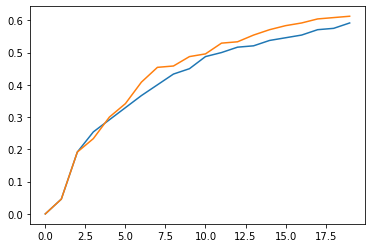

In [ ]:
plt.plot(CRTNet_accu_two[:20])
plt.plot(CRTNet_accu_original[:20])